### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

### Reading In Data

In [2]:
data=pd.read_csv('fetal_health.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


#### Converting 3 class problem into binary classification problem
Originally: 1 = Normal ; 2 = Suspect; 3 = Pathological

Modification: 0 = non-pathological (previously 1 and 2); 1 = pathological

In [3]:
data['fetal_health'] = data['fetal_health'].replace(1.0,0)
data['fetal_health'] = data['fetal_health'].replace(2.0,0)
data['fetal_health'] = data['fetal_health'].replace(3.0,1)
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,0.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,0.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,0.0


In [4]:
# to confirm that we have 0 and 1 
data.iloc[0:10]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,1.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,1.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,1.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,1.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,1.0


In [5]:
X = data.drop('fetal_health', axis = 1)
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [6]:
# Known output Y = classification result
y = data['fetal_health']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2121    0.0
2122    0.0
2123    0.0
2124    0.0
2125    0.0
Name: fetal_health, Length: 2126, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=142)
x_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
199,120.0,0.000,0.013,0.000,0.001,0.0,0.000,53.0,0.7,7.0,...,77.0,56.0,133.0,6.0,0.0,123.0,121.0,123.0,3.0,1.0
340,133.0,0.000,0.000,0.000,0.000,0.0,0.000,75.0,0.2,91.0,...,7.0,131.0,138.0,1.0,0.0,133.0,134.0,135.0,0.0,0.0
440,142.0,0.001,0.003,0.001,0.002,0.0,0.000,55.0,1.3,10.0,...,115.0,52.0,167.0,12.0,3.0,148.0,143.0,147.0,17.0,1.0
1427,144.0,0.006,0.000,0.004,0.000,0.0,0.000,39.0,1.0,5.0,...,43.0,136.0,179.0,1.0,0.0,157.0,157.0,157.0,4.0,0.0
1015,139.0,0.007,0.000,0.005,0.000,0.0,0.000,38.0,0.9,0.0,...,34.0,136.0,170.0,1.0,0.0,144.0,146.0,146.0,4.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,142.0,0.006,0.000,0.007,0.000,0.0,0.000,42.0,1.0,0.0,...,97.0,74.0,171.0,6.0,0.0,148.0,148.0,149.0,5.0,1.0
1616,144.0,0.003,0.049,0.002,0.006,0.0,0.001,66.0,3.4,0.0,...,113.0,67.0,180.0,7.0,0.0,141.0,110.0,147.0,89.0,1.0
1050,125.0,0.007,0.000,0.005,0.000,0.0,0.000,26.0,1.3,0.0,...,87.0,79.0,166.0,4.0,0.0,131.0,133.0,132.0,11.0,0.0
511,154.0,0.007,0.001,0.002,0.000,0.0,0.000,45.0,0.8,0.0,...,47.0,142.0,189.0,2.0,1.0,161.0,166.0,165.0,10.0,0.0


### Training with KNN with 3 neighbors

In [8]:

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [9]:
neigh.fit(x_train,y_train)
y_pred_test = neigh.predict(x_test)

0.971830985915493


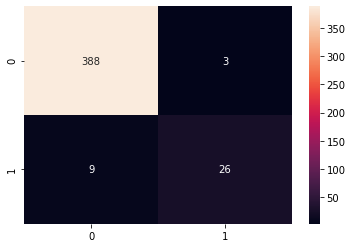

In [10]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True,annot_kws={"size": 10},fmt="d")
print(accuracy_score(y_test, y_pred_test))


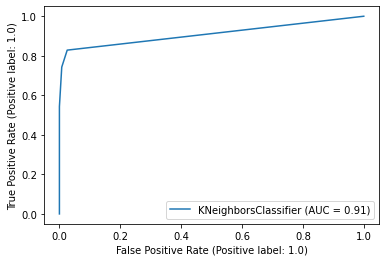

In [11]:
#ROC plot
from sklearn import  metrics
metrics.plot_roc_curve(neigh, x_test, y_test)
plt.show()

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       391
         1.0       0.90      0.74      0.81        35

    accuracy                           0.97       426
   macro avg       0.94      0.87      0.90       426
weighted avg       0.97      0.97      0.97       426



<AxesSubplot:xlabel='fetal_health', ylabel='count'>

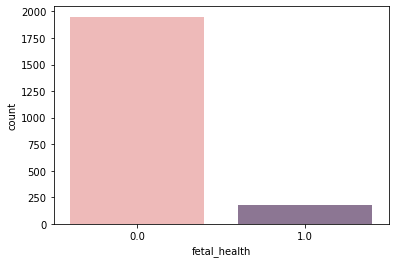

In [13]:
#Because the merging of two groups, our data is not balanced as a result. We have way more class 0 than class 1
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

### Class Imbalance
We have issue with class imabalance which can hinder our accuracy of model. Here are some methods that we can try
- Undersampling of class 0 
- Upsampling of class 1

#### Undersampling

In [14]:
#undersampling
class_0 = data[data['fetal_health'] == 0]
class_0

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,0.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,0.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,0.0


In [15]:
class_1 = data[data['fetal_health'] == 1]
class_1

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,1.0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,1.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,1.0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,1.0
9,122.0,0.000,0.000,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,128.0,0.000,0.002,0.007,0.005,0.0,0.002,65.0,2.6,0.0,...,63.0,192.0,6.0,0.0,103.0,92.0,114.0,28.0,0.0,1.0
2037,128.0,0.000,0.002,0.007,0.005,0.0,0.002,66.0,2.7,0.0,...,63.0,192.0,4.0,0.0,105.0,89.0,112.0,21.0,0.0,1.0
2038,128.0,0.000,0.002,0.007,0.006,0.0,0.002,65.0,2.5,0.0,...,63.0,192.0,6.0,0.0,104.0,94.0,115.0,28.0,0.0,1.0
2039,128.0,0.000,0.003,0.007,0.006,0.0,0.002,65.0,2.5,0.0,...,63.0,192.0,5.0,0.0,114.0,97.0,116.0,25.0,0.0,1.0


In [16]:
class_count_0, class_count_1 = data['fetal_health'].value_counts()
class_0_under = class_0.sample(class_count_1)
class_0_under #now class 0 and 1 have the same size

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
102,125.0,0.008,0.013,0.002,0.000,0.0,0.0,24.0,1.6,0.0,...,68.0,152.0,4.0,0.0,132.0,132.0,133.0,5.0,1.0,0.0
1482,132.0,0.000,0.000,0.007,0.001,0.0,0.0,47.0,0.7,1.0,...,114.0,145.0,1.0,0.0,136.0,134.0,136.0,2.0,1.0,0.0
1257,118.0,0.000,0.000,0.007,0.000,0.0,0.0,26.0,1.2,0.0,...,100.0,144.0,3.0,0.0,120.0,119.0,120.0,2.0,0.0,0.0
210,125.0,0.008,0.015,0.001,0.000,0.0,0.0,48.0,0.8,0.0,...,82.0,145.0,9.0,0.0,133.0,132.0,133.0,3.0,1.0,0.0
1973,138.0,0.006,0.002,0.003,0.000,0.0,0.0,60.0,0.8,0.0,...,125.0,168.0,1.0,0.0,148.0,144.0,147.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,144.0,0.003,0.000,0.006,0.000,0.0,0.0,40.0,0.8,5.0,...,112.0,168.0,2.0,0.0,157.0,153.0,155.0,5.0,1.0,0.0
1516,130.0,0.000,0.000,0.004,0.000,0.0,0.0,28.0,1.2,0.0,...,114.0,150.0,2.0,2.0,131.0,132.0,133.0,2.0,0.0,0.0
1389,121.0,0.007,0.000,0.010,0.000,0.0,0.0,41.0,0.8,0.0,...,105.0,153.0,3.0,0.0,150.0,135.0,137.0,32.0,1.0,0.0
1100,122.0,0.000,0.000,0.004,0.000,0.0,0.0,22.0,1.8,0.0,...,106.0,140.0,2.0,1.0,126.0,125.0,127.0,2.0,0.0,0.0


In [17]:
data_under = pd.concat([class_0_under, class_1], axis=0)
X_under = data_under.drop('fetal_health', axis = 1)
y_under = data_under['fetal_health']
x_train_u,x_test_u,y_train_u,y_test_u = train_test_split(X_under,y_under,test_size=0.2, random_state=142)
neigh_under = KNeighborsClassifier(n_neighbors=3)
neigh_under.fit(x_train_u,y_train_u)

y_pred_train_u = neigh_under.predict(x_train_u)
y_pred_test_u = neigh_under.predict(x_test_u)


0.8873239436619719


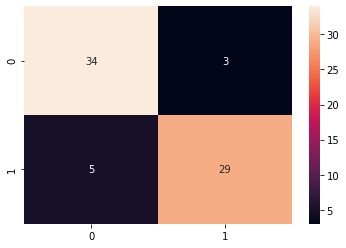

In [18]:
#confusion matrix
cm = confusion_matrix(y_test_u, y_pred_test_u)

sns.heatmap(cm, annot=True)
print(accuracy_score(y_test_u, y_pred_test_u))


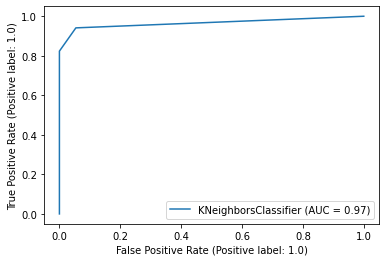

In [19]:
metrics.plot_roc_curve(neigh, x_test_u, y_test_u)
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test_u, y_pred_test_u))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89        37
         1.0       0.91      0.85      0.88        34

    accuracy                           0.89        71
   macro avg       0.89      0.89      0.89        71
weighted avg       0.89      0.89      0.89        71



#### Oversampling via SMOTE

In [21]:
#oversampling
class_1_over = class_1.sample(class_count_0, replace=True)
class_1_over

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1491,132.0,0.000,0.000,0.008,0.002,0.0,0.002,30.0,1.7,0.0,...,60.0,150.0,3.0,0.0,99.0,104.0,102.0,33.0,0.0,1.0
2025,129.0,0.000,0.000,0.006,0.010,0.0,0.001,65.0,2.6,0.0,...,50.0,151.0,9.0,2.0,105.0,91.0,113.0,13.0,0.0,1.0
1752,134.0,0.004,0.001,0.001,0.003,0.0,0.003,61.0,1.8,0.0,...,66.0,184.0,6.0,0.0,88.0,112.0,111.0,182.0,-1.0,1.0
2027,129.0,0.000,0.001,0.006,0.008,0.0,0.002,65.0,2.8,0.0,...,50.0,151.0,7.0,2.0,105.0,86.0,112.0,13.0,0.0,1.0
823,152.0,0.000,0.000,0.003,0.000,0.0,0.000,61.0,0.4,71.0,...,134.0,164.0,4.0,0.0,160.0,158.0,160.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,134.0,0.003,0.000,0.000,0.000,0.0,0.005,65.0,1.8,0.0,...,66.0,180.0,8.0,1.0,88.0,100.0,101.0,83.0,-1.0,1.0
240,125.0,0.000,0.009,0.000,0.000,0.0,0.000,68.0,0.3,75.0,...,120.0,128.0,0.0,0.0,125.0,125.0,126.0,0.0,0.0,1.0
328,146.0,0.000,0.000,0.000,0.000,0.0,0.000,84.0,0.2,81.0,...,140.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,0.0,1.0
769,134.0,0.000,0.000,0.000,0.000,0.0,0.000,81.0,0.2,91.0,...,133.0,136.0,1.0,0.0,135.0,134.0,136.0,0.0,1.0,1.0


In [22]:
data_over = pd.concat([class_1_over, class_0], axis=0)
data_over

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1491,132.0,0.000,0.000,0.008,0.002,0.0,0.002,30.0,1.7,0.0,...,60.0,150.0,3.0,0.0,99.0,104.0,102.0,33.0,0.0,1.0
2025,129.0,0.000,0.000,0.006,0.010,0.0,0.001,65.0,2.6,0.0,...,50.0,151.0,9.0,2.0,105.0,91.0,113.0,13.0,0.0,1.0
1752,134.0,0.004,0.001,0.001,0.003,0.0,0.003,61.0,1.8,0.0,...,66.0,184.0,6.0,0.0,88.0,112.0,111.0,182.0,-1.0,1.0
2027,129.0,0.000,0.001,0.006,0.008,0.0,0.002,65.0,2.8,0.0,...,50.0,151.0,7.0,2.0,105.0,86.0,112.0,13.0,0.0,1.0
823,152.0,0.000,0.000,0.003,0.000,0.0,0.000,61.0,0.4,71.0,...,134.0,164.0,4.0,0.0,160.0,158.0,160.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.000,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.000,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,0.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.000,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,0.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.000,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,0.0


In [23]:
X_over = data_over.drop('fetal_health', axis = 1)
y_over = data_over['fetal_health']
x_train_o,x_test_o,y_train_o,y_test_o = train_test_split(X_over,y_over,test_size=0.2, random_state=142)
neigh_over = KNeighborsClassifier(n_neighbors=3)
neigh_over.fit(x_train_o,y_train_o)
y_pred_train_o = neigh_over.predict(x_train_o)
y_pred_test_o = neigh_over.predict(x_test_o)

0.9923076923076923


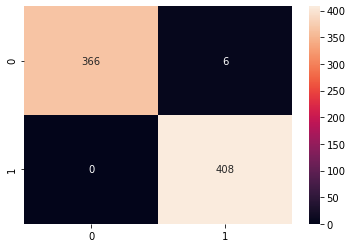

In [24]:
#confusion matrix

cm = confusion_matrix(y_test_o, y_pred_test_o)

sns.heatmap(cm, annot=True,annot_kws={"size": 10},fmt="d")
print(accuracy_score(y_test_o, y_pred_test_o))

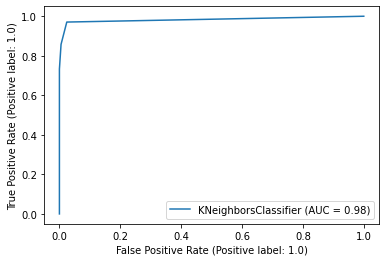

In [25]:
metrics.plot_roc_curve(neigh, x_test_o, y_test_o)
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test_o, y_pred_test_o))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       372
         1.0       0.99      1.00      0.99       408

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780

